## Amazon Sales Data : Price EDA
---
#### 데이터 로드 및 검토

In [276]:
import pandas as pd
import requests

amazon_df = pd.read_csv('../../data/amazon.csv')

In [277]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [278]:
amazon_df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


---
### Price 단위 변환
- 루피(₹) -> 달러($)

In [279]:
# discount_price와 actual_price 컬럼에서 '₹'와 ','를 제거하고 실수형으로 변환
price_cols = ['discounted_price', 'actual_price']
amazon_df[price_cols] = amazon_df[price_cols].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [303]:
# discount_percentage 컬럼에서 '%'를 제거하고 실수형으로 변환
amazon_df['discount_percentage'] = amazon_df['discount_percentage'].replace('%', '', regex=True).astype(float)

In [281]:
def fetch_exchange_rates(base_currency):
    """
    API를 호출하여 환율 정보를 가져와 exchange_rates에 저장
    :param base_currency: 기준 통화 코드 (예: 'USD')
    """
    global exchange_rates
    response = requests.get(f'https://api.exchangerate-api.com/v4/latest/{base_currency}')
    
    if response.status_code == 200:
        exchange_rates = response.json()['rates']
    else:
        return response.status_code


def exchange_rate(amount, from_currency, to_currency):
    """
    주어진 금액을 from_currency에서 to_currency로 변환
    :param amount: 변환할 금액
    :param from_currency: 변환할 통화의 코드 (예: 'USD')
    :param to_currency: 결과 통화의 코드 (예: 'EUR')
    :return: 변환된 금액
    """
    
    if not exchange_rates:
        fetch_exchange_rates(to_currency)
    try:
        if from_currency not in exchange_rates or to_currency not in exchange_rates:
            raise ValueError("잘못된 통화 코드입니다.")
        converted_amount = (amount / exchange_rates[from_currency]) * exchange_rates[to_currency]
        return round(converted_amount, 2)
    except Exception as e:
        print(f"오류 발생: {e}")
        return None

In [282]:
# 함수 테스트
fetch_exchange_rates('USD')  
exchange_rate(10, 'USD', 'KRW')

13449.1

In [283]:
# API 호출
fetch_exchange_rates('KRW')

# dataframe에 적용할 함수
def convert_currency(row, col):
    return exchange_rate(row[col], 'INR', 'KRW')

# DataFrame에 환율 변환 결과 추가
amazon_df['discounted_price_KRW'] = amazon_df.apply(lambda row: convert_currency(row, 'discounted_price'), axis=1).astype(int)
amazon_df['actual_price_KRW'] = amazon_df.apply(lambda row: convert_currency(row, 'actual_price'), axis=1).astype(int)

In [284]:
amazon_df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,6384,17584
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,3184,5584


---
### 카테고리별 할인 가격과 할인율 분포
- Big category 추출

In [285]:
cols = ['category', 'discount_percentage', 'discounted_price_KRW', 'actual_price_KRW']
category_price = amazon_df[cols]

In [286]:
# 'category' 열을 '|'로 분리하여 첫 번째 요소를 'big_category' 열로 추가
category_price.loc[:, 'big_category'] = category_price['category'].apply(lambda x: x.split('|')[0])

/var/folders/7y/sc8hkqqj2b78cbbjbty9xcx40000gn/T/ipykernel_5249/31239668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_price.loc[:, 'big_category'] = category_price['category'].apply(lambda x: x.split('|')[0])


In [287]:
category_price['big_category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [288]:
category_price.head(2)

,category,discount_percentage,discounted_price_KRW,actual_price_KRW,big_category
0,Computers&Accessories|Accessories&Peripherals|...,64,6384,17584,Computers&Accessories
1,Computers&Accessories|Accessories&Peripherals|...,43,3184,5584,Computers&Accessories


#### big category별 할인 가격과 할인율 분포

In [289]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [290]:
# 카테고리 별 데이터 개수 체크
big_category_count = category_price.groupby('big_category').size().reset_index(name='count')
big_category_count.sort_values('count', ascending=False, inplace=True)
big_category_count

,big_category,count
2,Electronics,526
1,Computers&Accessories,453
4,Home&Kitchen,448
7,OfficeProducts,31
5,HomeImprovement,2
6,MusicalInstruments,2
0,Car&Motorbike,1
3,Health&PersonalCare,1
8,Toys&Games,1


In [291]:
# 상품 할인 가격별 할인율 분포
def discount_percentage_scatterplot(data):

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='discounted_price_KRW', y='discount_percentage', hue='big_category', data=data, palette='Set1')

    plt.xlabel('Discounted Price (KRW)')
    plt.ylabel('Discount Percentage')

    # 단위 축소 비활성화
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='x')

    plt.legend(title='Big Category')
    plt.show()

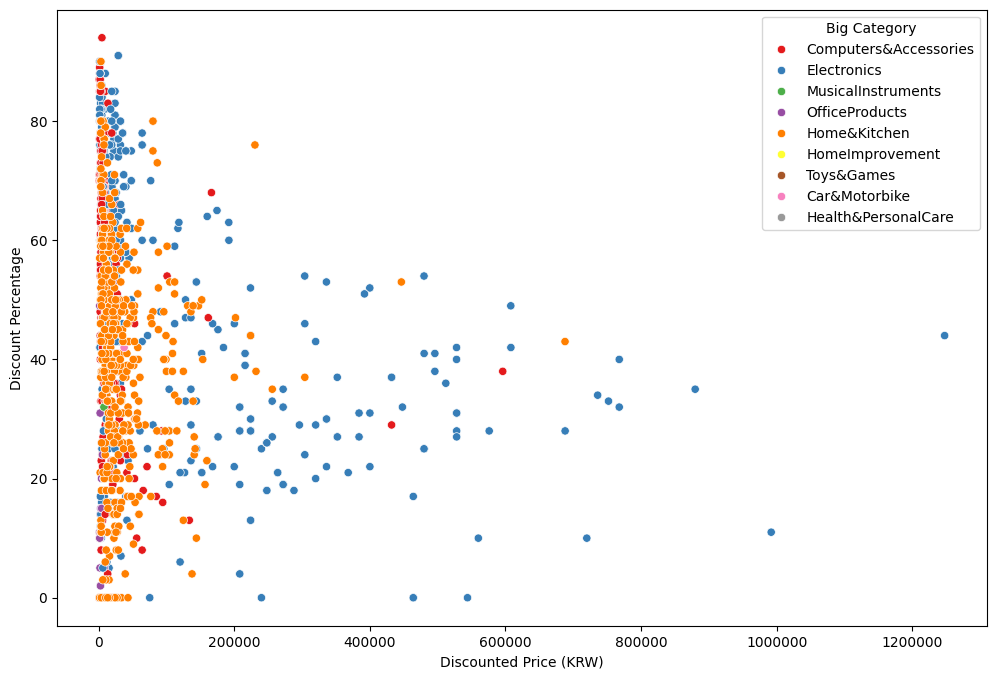

In [292]:
discount_percentage_scatterplot(category_price)

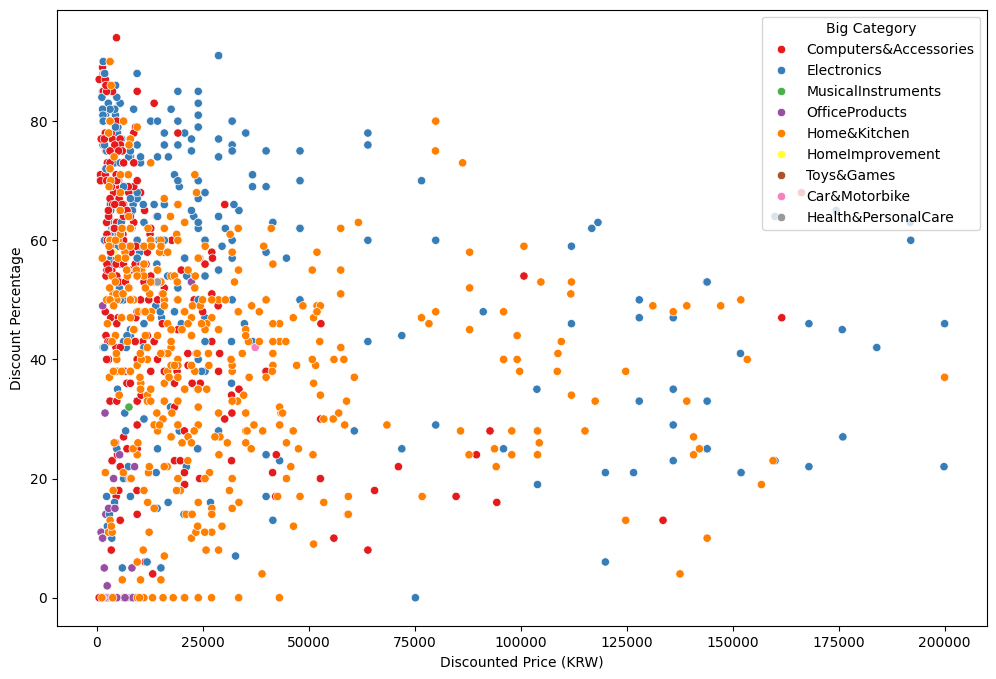

In [293]:
# 위 그래프에서 가장 많아 보이는 0 ~ 200000 범위만 확대해보기
filtered_df = category_price[(category_price['discounted_price_KRW'] >= 0) & (category_price['discounted_price_KRW'] <= 200000)]
discount_percentage_scatterplot(filtered_df)

- Computers&Accessories 카테고리는 낮은 가격대에 분포되어있다.
- Electonics 카테고리는 할인된 가격이 다른 카테고리에 비해 높고 할인율이 고루 분포되어 있지만 할인된 가격이 낮은 상품은 할인율이 60~90%에 밀집된 부분이 있다.
- Home&Kitchen 카테고리는 할인율이 고루 분포되어 있지만 40~80%에 밀집된 부분이 있다.
- OfficeProducts 카테고리는 데이터량이 적다. 대부분 낮은 가격대와 낮은 할인율을 가지고 있다.

---
### 별점과 할인율의 상관관계

In [304]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1463 non-null   object 
 1   product_name          1463 non-null   object 
 2   category              1463 non-null   object 
 3   discounted_price      1463 non-null   float64
 4   actual_price          1463 non-null   float64
 5   discount_percentage   1463 non-null   float64
 6   rating                1463 non-null   object 
 7   rating_count          1463 non-null   object 
 8   about_product         1463 non-null   object 
 9   user_id               1463 non-null   object 
 10  user_name             1463 non-null   object 
 11  review_id             1463 non-null   object 
 12  review_title          1463 non-null   object 
 13  review_content        1463 non-null   object 
 14  img_link              1463 non-null   object 
 15  product_link          1463

In [295]:
# discounted_price_KRW 컬럼에서 null 값인 행 필터링
amazon_df[amazon_df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,3184,15984
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,3984,15984


In [296]:
# null값 제외
amazon_df = amazon_df[amazon_df['rating_count'].notnull()]

- 별점을 매긴 사용자가 한 명뿐인 것으로 보임. 결측치가 포함된 행은 제거

In [307]:
# 숫자가 아닌 값을 포함한 행 필터링
non_numeric_ratings = amazon_df[~amazon_df['rating'].str.replace('.', '', regex=False).str.isnumeric()]
non_numeric_ratings

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_price_KRW,actual_price_KRW
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,33584,39984


In [308]:
amazon_df.loc[amazon_df['rating'].str.contains('|', regex=False), 'rating'] = 3.0

- 별점을 매긴 사용자 수는 많지만 별점 값이 숫자가 아님. 중간값인 3.0으로 대체

In [310]:
# 상관 계수 계산
correlation = amazon_df[['rating', 'discount_percentage']].corr()
print(correlation)

                       rating  discount_percentage
rating               1.000000            -0.151031
discount_percentage -0.151031             1.000000


In [312]:
correlation = amazon_df[['rating', 'actual_price_KRW']].corr()
print(correlation)

                    rating  actual_price_KRW
rating            1.000000          0.122567
actual_price_KRW  0.122567          1.000000
